In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Training dataset

In [109]:
book = pd.read_excel('/Users/Ganesh/Downloads/Participants_Data-20190926T094854Z-001/Participants_Data/Data_Train.xlsx')

In [110]:
book.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [111]:
print('There are {0} rows and {1} columns'.format(book.shape[0], book.shape[1]))

There are 6237 rows and 9 columns


In [112]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.6+ KB


There are no missing items in this dataset.

The target variable is Price.

I will consider the following features:
    Edition
    Reviews
    Ratings
    BookCategory

Since Author, Title and Synopsis are text based field, I will omit these columns. Also Genre and BookCategory almost the same, I will consider the Book category field.

In [113]:
book.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [114]:
book['BookCategory'].unique()

array(['Action & Adventure', 'Biographies, Diaries & True Accounts',
       'Humour', 'Crime, Thriller & Mystery', 'Arts, Film & Photography',
       'Sports', 'Language, Linguistics & Writing',
       'Computing, Internet & Digital Media', 'Romance',
       'Comics & Mangas', 'Politics'], dtype=object)

In [115]:
book['Reviews'] = book['Reviews'].apply(lambda x: float(x.split()[0]))

In [116]:
book['Ratings'] = book['Ratings'].apply(lambda x: x.split()[0]).apply(lambda x : int(x.replace(',','')))

In [117]:
book['Edition'] = book['Edition'].str.replace(r"\((.*)\)", "").str.extract("([a-zA-Z]+)", expand=False)

In [118]:
book['Edition'].unique()

array(['Paperback', 'Hardcover', 'Mass', 'Sheet', 'Flexibound', 'Plastic',
       'Loose', 'Tankobon', 'Perfect', 'Board', 'Cards', 'Spiral',
       'Product', 'Library', 'Leather'], dtype=object)

In [119]:
book.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Paperback,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Hardcover,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [120]:
#drop the unnecessary columns

cols = ['Title', 'Author', 'Synopsis', 'Genre' ]

for i in cols:
    book.drop(i,axis=1,inplace=True)

In [121]:
book.head()

,Edition,Reviews,Ratings,BookCategory,Price
0,Paperback,4.0,8,Action & Adventure,220.00
1,Paperback,3.9,14,"Biographies, Diaries & True Accounts",202.93
2,Paperback,4.8,6,Humour,299.00
3,Paperback,4.1,13,"Crime, Thriller & Mystery",180.00
4,Hardcover,5.0,1,"Arts, Film & Photography",965.62


### Vizualizing Target Variable

E:\BIGDATA\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


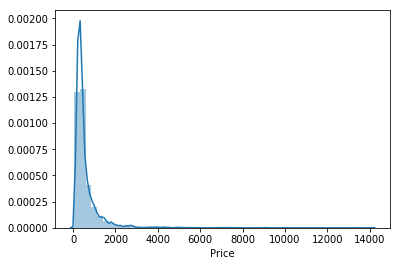

In [122]:
sns.distplot(book['Price'])

We see that the target variable SalePrice has a right-skewed distribution. We'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric.

In [123]:
#skewness
print("The skewness of SalePrice is {}".format(book['Price'].skew()))

The skewness of SalePrice is 6.749865573718627


Skewness is 0.42013939835002867


E:\BIGDATA\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


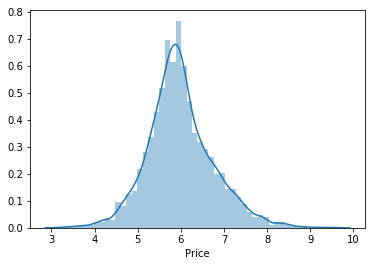

In [124]:
#now transforming the target variable
target = np.log(book['Price'])
print ('Skewness is', target.skew())
sns.distplot(target)

As you saw, log transformation of the target variable has helped us fixing its skewed distribution and the new distribution looks closer to normal.

### Test Dataset

In [125]:
book_test = pd.read_excel('/Users/Ganesh/Downloads/Participants_Data-20190926T094854Z-001/Participants_Data/Data_Test.xlsx')

In [126]:
book_test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [127]:
print('There are {0} rows and {1} columns'.format(book_test.shape[0], book_test.shape[1]))

There are 1560 rows and 8 columns


In [128]:
book_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Reviews         1560 non-null object
Ratings         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [129]:
book_test['BookCategory'].unique()
book_test['Reviews'] = book_test['Reviews'].apply(lambda x: float(x.split()[0]))
book_test['Ratings'] = book_test['Ratings'].apply(lambda x: x.split()[0]).apply(lambda x : int(x.replace(',','')))
book_test['Edition'] = book_test['Edition'].str.replace(r"\((.*)\)", "").str.extract("([a-zA-Z]+)", expand=False)
book_test['Edition'].unique()


array(['Mass', 'Paperback', 'Hardcover', 'Cards', 'Sheet', 'Flexibound',
       'Spiral', 'Loose'], dtype=object)

In [130]:
book_test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,Mass,4.4,960,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,Paperback,5.0,1,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,Paperback,5.0,4,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,Paperback,4.1,11,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,Paperback,4.4,9,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [131]:
#drop the unnecessary columns

cols = ['Title', 'Author', 'Synopsis', 'Genre' ]

for i in cols:
    book_test.drop(i,axis=1,inplace=True)

In [132]:
book_test.head()

,Edition,Reviews,Ratings,BookCategory
0,Mass,4.4,960,"Crime, Thriller & Mystery"
1,Paperback,5.0,1,"Computing, Internet & Digital Media"
2,Paperback,5.0,4,Romance
3,Paperback,4.1,11,"Computing, Internet & Digital Media"
4,Paperback,4.4,9,"Language, Linguistics & Writing"


In [138]:
le_cols = ['Edition', 'BookCategory']

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [146]:
# Categorical boolean mask
categorical_feature_mask = book.dtypes==object

In [147]:
# filter categorical columns using mask and turn it into a list
categorical_cols = book.columns[categorical_feature_mask].tolist()

In [148]:
categorical_cols

['Edition', 'BookCategory']

In [149]:
# apply le on categorical feature columns
book[categorical_cols] = book[categorical_cols].apply(lambda col: le.fit_transform(col))
book[categorical_cols].head(10)

,Edition,BookCategory
0,8,0
1,8,2
2,8,6
3,8,5
4,3,1
5,8,10
6,8,5
7,3,10
8,8,2
9,8,0


In [150]:
book.head()

,Edition,Reviews,Ratings,BookCategory,Price
0,8,4.0,8,0,220.00
1,8,3.9,14,2,202.93
2,8,4.8,6,6,299.00
3,8,4.1,13,5,180.00
4,3,5.0,1,1,965.62


In [151]:
# apply le on categorical feature columns
book_test[categorical_cols] = book_test[categorical_cols].apply(lambda col: le.fit_transform(col))
book_test[categorical_cols].head(10)

,Edition,BookCategory
0,4,5
1,5,4
2,5,9
3,5,4
4,5,7
5,5,1
6,5,4
7,5,5
8,2,8
9,5,0


In [152]:
book_test.head()

,Edition,Reviews,Ratings,BookCategory
0,4,4.4,960,5
1,5,5.0,1,4
2,5,5.0,4,9
3,5,4.1,11,4
4,5,4.4,9,7


### Data Exploration

In [155]:
#Perform Label encoding for the following columns - Edition and Book Category

#book_df = pd.get_dummies(book, columns=['Edition','BookCategory'], drop_first=True)

In [156]:
#book_df.head()

In [153]:
#book_test_df = pd.get_dummies(book_test, columns=['Edition','BookCategory'], drop_first=True)
#book_test_df.head()

In [157]:
#Create X and Y variable for modelling

X = book.loc[:, book.columns!='Price']
y  = book_df['Price'].values
#y = np.log(book_df['Price']).values

In [161]:
X_test = book_test.loc[:]

In [162]:
X_test.shape

(1560, 4)

In [163]:
X.shape

(6237, 4)

In [164]:
#Split the dataset

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [165]:
X_train.shape, X_val.shape,y_train.shape, y_val.shape

((4677, 4), (1560, 4), (4677,), (1560,))

### Modelling

In [166]:
#Modelling

from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [167]:
y_pred = lr.predict(X_val)
print('----------------------------\nThe predictions are \n', y_pred)

----------------------------
The predictions are 
 [ 379.9740748   420.79764104 1004.83102147 ...  475.67467973  476.1520131
  572.10998164]


In [168]:
def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1 - error
    return score

In [169]:
print("\n----------------------------\nRMLSE Score = ", rmlse(y_val, y_pred))


----------------------------
RMLSE Score =  0.6580118190220366


In [170]:
lr.predict(X_test)

array([584.38811369, 832.20579147, 831.35501723, ..., 744.09652848,
       701.18698954, 788.45835056])

In [171]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, criterion='mse', n_jobs= -1, random_state=2)

In [172]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [173]:
y_pred = rfr.predict(X_val)
print('--------------------\n The predictions are \n', y_pred)

--------------------
 The predictions are 
 [263.7884     189.54366667 966.18426725 ... 455.21926667 442.38918905
 801.68062013]


In [174]:
print("\n----------------------------\nRMLSE Score = ", rmlse(y_val, y_pred))


----------------------------
RMLSE Score =  0.6766932077571756


In [176]:
y_pred_rfr = rfr.predict(X_test)

==================================================

In [177]:
# Saving the predictions in excel file

solution = pd.DataFrame(y_pred_rfr, columns = ['Price'])
solution.to_excel('Predict_Book_Price_Soln.xlsx', index = False)

In [178]:
solution.head()

,Price
0,808.940000
1,1343.033289
2,481.708190
3,794.933400
4,303.337600


In [125]:
#Use standard scaler

#Feature Scaling

X = book_df.loc[:, book_df.columns!='Price']
y  = book_df['Price'].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [132]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

lr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [133]:
y_pred = lr.predict(X_test_std)
print('----------------------------\nThe predictions are \n', y_pred)

----------------------------
The predictions are 
 [230.37750342 265.15985435 937.74776791 ... 378.66748495 433.60637371
 758.38965195]


In [134]:
print("\n----------------------------\nRMLSE Score = ", rmlse(y_test, y_pred))


----------------------------
RMLSE Score =  0.6858409104188434
